# Project Desciption

The sentiments of the customers and their reviews are one of the most important aspects to keep in mind for the company so here we are making a model to predict the sentiments of the customers for the products as per their reviews and ratings.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the dataset into pandas dataframe

In [15]:
df=pd.read_csv("flipkart.csv")
df.head()

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,1,N,Y,One Star,garbage,31-08-2015
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015
3,US,31009192,R19JT1LFVNATBG,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,0,N,N,We love the camera but had a lot of difficulty...,We purchased a Foscam about 6 months ago. We l...,30-08-2015
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,2,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015


# No. of rows and columns

In [16]:
df.shape

(4652, 13)

# Total. no of null values in dataframe

In [17]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

There are no null values in the dataframe.

## Plotting a Bar Graph based on Star Rating & Number of Votes

In [18]:
df['star_rating'].value_counts()

5    2570
4     937
1     556
3     314
2     275
Name: star_rating, dtype: int64

<BarContainer object of 5 artists>

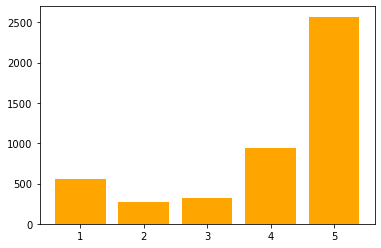

In [19]:
stars = [1 , 2 , 3 , 4, 5]
no_of_votes = [556 , 275 , 314 , 937 , 2570]
plt.bar(stars, no_of_votes, color = 'orange')

# Deleting unnecessary columns

In [20]:
df.drop(['review_body','review_date', 'marketplace', 'customer_id','helpful_votes', 'product_category','vine','review_headline','review_id', 'product_title'], axis=1, inplace=True)

# Here we define the function

In [21]:
def sentiment(n):
    star_rating = n
    if star_rating >= 3:
        return 1
    else:
        return 0

# Inserting a new column 'sentiment'

In [22]:
df['sentiment'] = df['star_rating'].apply(sentiment)
df.head()

,star_rating,total_votes,verified_purchase,sentiment
0,1,1,Y,0
1,1,0,N,0
2,1,0,Y,0
3,5,0,N,1
4,2,0,N,0


# Counting no. of positive and negative sentiments

In [23]:
df['sentiment'].value_counts()

1    3821
0     831
Name: sentiment, dtype: int64

# Plotting a bar graph based on sentiments

<AxesSubplot:xlabel='sentiment', ylabel='count'>

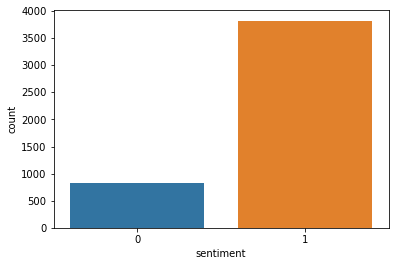

In [24]:
sns.countplot(x="sentiment",data= df)

This is the data representation of sentiments.

# Using a dummy variable use a single equation to represent multiple groups

In [25]:
verifiedpurchase=pd.get_dummies(df["verified_purchase"], drop_first=True)
verifiedpurchase.head()

,Y
0,1
1,0
2,1
3,0
4,0


# Plotting a pie chart

Here, we get that the dataframe contains 80.8% of positive rating and 19.2% of negative rating of the product 'camera'.

In [26]:
totalvotes=pd.get_dummies(df["total_votes"], drop_first=True)
totalvotes.head()

,1,2,3,4,5,6,7,8,9,10,...,103,115,143,151,162,169,186,257,2198,2269
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we are using of total votes as dummy vairable

In [27]:
df.head()

,star_rating,total_votes,verified_purchase,sentiment
0,1,1,Y,0
1,1,0,N,0
2,1,0,Y,0
3,5,0,N,1
4,2,0,N,0


### Combining dummy variables (total votes, verified purchase) 

In [28]:
df=pd.concat([df, totalvotes, verifiedpurchase], axis=1)
df.head()

,star_rating,total_votes,verified_purchase,sentiment,1,2,3,4,5,6,...,115,143,151,162,169,186,257,2198,2269,Y
0,1,1,Y,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,Y,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,N,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.drop('verified_purchase', axis=1, inplace=True)
df.head()

,star_rating,total_votes,sentiment,1,2,3,4,5,6,7,...,115,143,151,162,169,186,257,2198,2269,Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Defining Dependent Variable (Y) and Independent Variables (X)

In [30]:
X=df.drop("sentiment", axis=1)
y = df['sentiment']

In [31]:
X

,star_rating,total_votes,1,2,3,4,5,6,7,8,...,115,143,151,162,169,186,257,2198,2269,Y
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,1,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4648,4,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4649,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4650,5,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Dividing the data into train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Fitting the training data into the model using logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicting the test data

In [34]:
y_pred=model.predict(X_test)

### Measuring the quality of prediction from classification algorithm

In [35]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       242\n           1       1.00      1.00      1.00      1154\n\n    accuracy                           1.00      1396\n   macro avg       1.00      1.00      1.00      1396\nweighted avg       1.00      1.00      1.00      1396\n'

### Evaluating the performence of classification model

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, y_pred)

array([[ 242,    0],
       [   0, 1154]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

### Measuring the accuracy of our prediction

In [39]:
accuracy_score(y_test, y_pred)

1.0

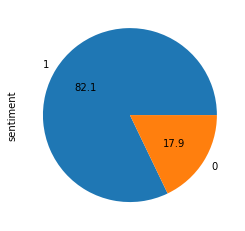

In [40]:
df=df['sentiment'].value_counts()
df.plot(radius=1,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=5)